In [39]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise

Scrape the main table of [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) and try to answer the following:
1. Which producers have the most films in the top 100? 
2. Can you find the gross earnings by distributor?

[Link to the solutions. Don't cheat!](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/solutions.ipynb)

In [40]:
# That's the URL you should use
url = 'https://www.boxofficemojo.com/intl/uk/yearly/'

In [41]:
# Access the webpage content
request = requests.get(url)

In [42]:
# Parse the HTML page
soup = BeautifulSoup(request.text, 'html.parser')

In [43]:
# Choose the relevant table
table = soup.find_all('table')[0]

In [48]:
lst = []
header = False

for row in table.find_all('tr'):
    if not header:
        header = True
        continue
        
    s = pd.Series([data.text for data in row.find_all('td')])
    lst.append(s)


In [49]:
# Concatenate the data in a Pandas DataFrame and place the first row of the DataFrame as header. Use the .head() method to check your DataFrame.
data = pd.concat(lst, axis=1).T
new_header = data.iloc[0].str.strip()
data = data[1:]
data.columns = new_header
data.head()

,2023,"$1,119,442,948",-,862,"$1,298,657",Barbie
1,2022,"$1,127,769,400",+58.4%,717,"$1,572,900",Top Gun: Maverick
2,2021,"$711,909,602",+75.2%,432,"$1,647,938",No Time to Die
3,2020,"$406,382,690",-74.8%,521,"$780,005",1917
4,2019,"$1,612,264,840",-5.7%,800,"$2,015,331",Avengers: Endgame
5,2018,"$1,709,482,412",+1.1%,730,"$2,341,756",Avengers: Infinity War


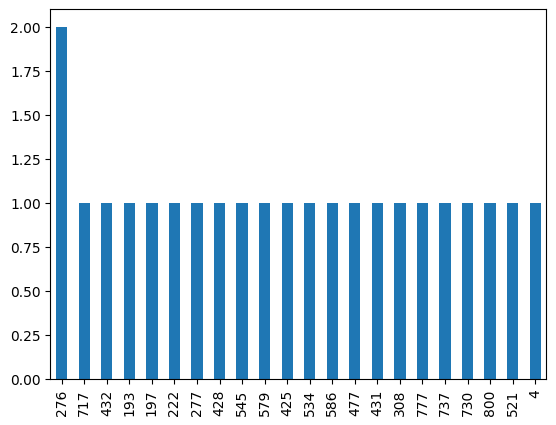

In [50]:
data[data.columns[3]].value_counts().plot(kind='bar')
plt.show()

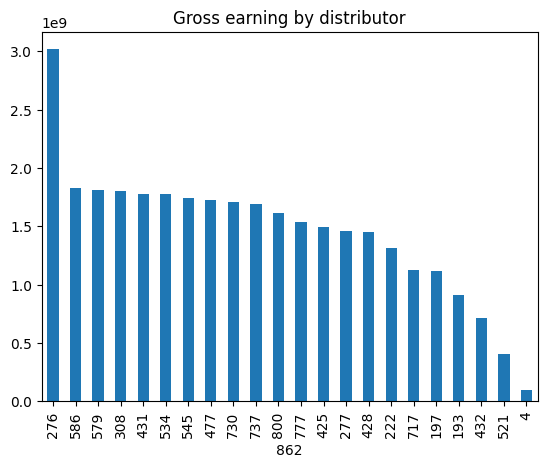

In [51]:
# Q2: Gross earnings by distributors
data[data.columns[1]] = data[data.columns[1]].apply(lambda x: int(x[1:].replace(',', '')))

data.groupby(data.columns[3])[data.columns[1]].sum().sort_values(ascending=False).plot(kind='bar', title='Gross earning by distributor')

plt.show()

## Advanced web scraping tools

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[ARGUS](https://github.com/datawizard1337/ARGUS)** is an easy-to-use web mining tool that's built on Scrapy. It is able to crawl a broad range of different websites.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

For now, let's see how Selenium works.

### How to install Selenium
1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers). **Note:** Choose a driver that corresponds to your web browser's version. Unzip the file and move the executable to your working directory.

#### Important note on Selinium and web drivers
If you are running this notebook locally, follow the above steps and run the code directly below (change the path to where your web driver is located). If you are running this notebook on colab, skip the next cell and run the one below it.

### Scraping data with Selenium
We will use [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) to scrape not only the top 100 but all the top movies of 2019. This will be our pipeline:

<img src='../../figures/Web-Scraping/selenium-pipeline.png' width='1024'>

In [35]:
from selenium import webdriver

#driver = webdriver.Chrome()


In [36]:
def html2df(source, q):
    """A wrapper of the scraping pipeline we used before."""
    # Parse the HTML page
    soup = BeautifulSoup(source, 'html.parser')

    # Choose the relevant table
    table = soup.find_all('table')[4]

    # Parse and store the data of every table row
    lst = []
    for row in table.find_all('tr'):
        s = pd.Series([data.text for data in row.find_all('td')])
        lst.append(s)

    # Concatenate the data in a Pandas DataFrame and place the first row of the DataFrame as header.
    data = pd.concat(lst, axis=1).T

    # Grab the first row for the header
    new_header = data.iloc[0]

    # Take the data less the header row
    data = data[1:]

    # Set the header row as the df header
    data.columns = new_header
    
    # Add a new column tagging the page we scraped
    data['page'] = q 
    
    return data

In [28]:

url = 'https://www.boxofficemojo.com/intl/uk/yearly/'

In [38]:
driver = webdriver.Chrome()
# URL to use in Selenium
driver.get(url)

lst = []
for i in range(2001, 2019):
    year = str(i)
    
    xpath = f"href='/year/2023/?area=GB&ref_=bo_yl_table_1''{year}')]"
    elem = driver.find_element_by_xpath(xpath)
    elem.click()
    
    lst.append(html2df(driver.page_source, year))

annual_top_100 = pd.concat(lst, sort=False)



AttributeError: 'WebDriver' object has no attribute 'find_element_by_xpath'